In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('student.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
cat_data = data.select_dtypes(include = 'object')
cat_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


In [4]:
num_data = data.select_dtypes(exclude = 'object')
num_data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lb = LabelEncoder()

In [7]:
cat_data = cat_data.apply(lb.fit_transform)
cat_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


In [8]:
new_data = pd.concat([cat_data,num_data],axis=1)
new_data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,2,40,50,12,50


In [9]:
X = new_data.drop(['Class'],axis=1)
X.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,40,50,12,50


In [10]:
y = new_data['Class']
y.head()


0    2
1    2
2    1
3    1
4    2
Name: Class, dtype: int32

In [11]:
from sklearn.feature_selection import chi2

In [12]:
chi_scores = chi2(X,y)

In [13]:
chi_scores

(array([1.21501902e+01, 6.95502702e+00, 9.75721839e+00, 1.36112198e+00,
        7.18665588e+00, 5.15850555e-01, 1.39038817e+01, 3.99229972e+00,
        4.79717673e+01, 4.17220341e+01, 2.68172275e+01, 8.96127511e+01,
        4.12455120e+03, 4.70083310e+03, 2.61890570e+03, 8.09349399e+02]),
 array([2.29942746e-003, 3.08841086e-002, 7.60758735e-003, 5.06332865e-001,
        2.75066375e-002, 7.72652965e-001, 9.56776387e-004, 1.35857347e-001,
        3.82880351e-011, 8.71315417e-010, 1.50214912e-006, 3.47406824e-020,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.78653309e-176]))

In [14]:
p_values = pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

<AxesSubplot:>

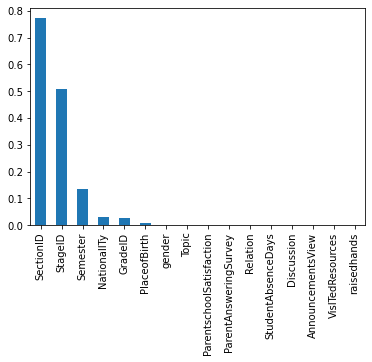

In [15]:
p_values.plot.bar()

In [16]:
from scipy.stats import pointbiserialr

In [17]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [18]:
pbc = pointbiserialr(num_data.raisedhands,y)
print(pbc)

PointbiserialrResult(correlation=-0.23101578434712627, pvalue=3.096280642820022e-07)


In [19]:
pbc = pointbiserialr(num_data.VisITedResources,y)
print(pbc)

PointbiserialrResult(correlation=-0.1617480215704172, pvalue=0.0003737784433080825)


In [20]:
pbc = pointbiserialr(num_data.AnnouncementsView,y)
print(pbc)

PointbiserialrResult(correlation=-0.1439958999662883, pvalue=0.0015611683154396266)


In [21]:
pbc = pointbiserialr(num_data.Discussion,y)
print(pbc)

PointbiserialrResult(correlation=-0.12197106866705337, pvalue=0.007466682873850967)


In [24]:
pbc = pointbiserialr(new_data.StudentAbsenceDays,y)
print(pbc)

PointbiserialrResult(correlation=-0.19908309034002775, pvalue=1.1108751098318804e-05)


In [26]:
pbc = pointbiserialr(new_data.Relation,y)
print(pbc)

PointbiserialrResult(correlation=-0.27211066472404166, pvalue=1.3541361734106763e-09)


In [27]:
pbc = pointbiserialr(new_data.ParentAnsweringSurvey,y)
print(pbc)

PointbiserialrResult(correlation=-0.12325402809883848, pvalue=0.006858545631297158)


In [28]:
pbc = pointbiserialr(new_data.ParentschoolSatisfaction,y)
print(pbc)

PointbiserialrResult(correlation=-0.14627672256577778, pvalue=0.001310323731986099)


In [29]:
pbc = pointbiserialr(new_data.Topic,y)
print(pbc)

PointbiserialrResult(correlation=0.10361026057198976, pvalue=0.02319657564597706)


In [30]:
pbc = pointbiserialr(new_data.gender,y)
print(pbc)

PointbiserialrResult(correlation=0.12367522194132291, pvalue=0.00666879421019698)


In [31]:
pbc = pointbiserialr(new_data.PlaceofBirth,y)
print(pbc)

PointbiserialrResult(correlation=-0.09897501702384393, pvalue=0.030150612059724236)


In [34]:
a = ['raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','Topic','gender','PlaceofBirth']
a

['raisedhands',
 'VisITedResources',
 'AnnouncementsView',
 'Discussion',
 'StudentAbsenceDays',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'Topic',
 'gender',
 'PlaceofBirth']

In [36]:
df = X[a]
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,Topic,gender,PlaceofBirth
0,15,16,2,20,1,0,1,1,7,1,4
1,20,20,3,25,1,0,1,1,7,1,4
2,10,7,0,30,0,0,0,0,7,1,4
3,30,25,5,35,0,0,0,0,7,1,4
4,40,50,12,50,0,0,0,0,7,1,4


In [37]:
y.head()

0    2
1    2
2    1
3    1
4    2
Name: Class, dtype: int32

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [41]:
df = sc.fit_transform(df)
df

array([[-1.03342931, -1.17407456, -1.35116659, ...,  0.51516218,
         0.7574764 , -0.15155299],
       [-0.87081258, -1.05302945, -1.31354928, ...,  0.51516218,
         0.7574764 , -0.15155299],
       [-1.19604604, -1.44642607, -1.4264012 , ...,  0.51516218,
         0.7574764 , -0.15155299],
       ...,
       [ 0.26750452,  0.58107959, -0.48596856, ..., -0.07570484,
        -1.32017315, -0.53241913],
       [-0.54557912, -1.14381328, -0.89975892, ...,  0.21972867,
        -1.32017315, -0.53241913],
       [-0.3829624 , -1.23459712, -0.56120318, ...,  0.21972867,
        -1.32017315, -0.53241913]])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.3,random_state=42)

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model = GaussianNB()

In [46]:
model.fit(X_train,y_train)

GaussianNB()

In [47]:
model.score(X_train,y_train)

0.75

In [48]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1])

In [49]:
b = {'actual' : y_test, 'predicted' : y_pred}

In [50]:
pd.DataFrame(b)

,actual,predicted
73,2,1
414,1,1
394,0,0
277,0,0
399,0,0
...,...,...
45,1,1
16,2,1
451,0,2
371,2,1


In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
accuracy_score(y_test,y_pred)

0.75

In [53]:
confusion_matrix(y_test,y_pred)

array([[24,  0,  7],
       [ 0, 42,  3],
       [13, 13, 42]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71        31
           1       0.76      0.93      0.84        45
           2       0.81      0.62      0.70        68

    accuracy                           0.75       144
   macro avg       0.74      0.78      0.75       144
weighted avg       0.76      0.75      0.75       144



In [55]:
import seaborn as sns